In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataframe = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [119]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']

raw_dataset = pd.read_csv(dataframe, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail(4)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [120]:
dataset.shape

(398, 8)

In [121]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [122]:
dataset = dataset.dropna(axis = 0)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [123]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
ModelYear,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [124]:
dataset1 = dataset._get_numeric_data ()
X = dataset1.drop (['MPG', 'Origin'], axis = 1) 
vif = pd.DataFrame () 
vif ["VIF Factor"] = [variance_inflation_factor (X.values, i) for i in range (X .shape [1])] 
vif ["características"] = X.columns 
vif.round (1)

,VIF Factor,características
0,116.0,Cylinders
1,86.5,Displacement
2,60.3,Horsepower
3,137.5,Weight
4,69.4,Acceleration
5,109.3,ModelYear


In [126]:
X = dataset1.drop (['MPG', 'Origin','Cylinders', 'Weight'] , axis = 1) 
vif = pd.DataFrame () 
vif ["VIF Factor"] = [variance_inflation_factor (X.values, i) for i in range (X .shape [1])] 
vif ["características"] = X.columns 
vif.round (1)

,VIF Factor,características
0,23.6,Displacement
1,50.1,Horsepower
2,54.9,Acceleration
3,96.0,ModelYear


In [127]:
correlacion = dataset.corr()
correlacion["MPG"].sort_values(ascending=False)

MPG             1.000000
ModelYear       0.580541
Origin          0.565209
Acceleration    0.423329
Cylinders      -0.777618
Horsepower     -0.778427
Displacement   -0.805127
Weight         -0.832244
Name: MPG, dtype: float64

### Modelo 1

In [101]:
lm = smf.ols(formula="MPG~Horsepower", data = dataset).fit()

In [102]:
lm.params

Intercept     39.935861
Horsepower    -0.157845
dtype: float64

In [46]:
lm.pvalues

Intercept     1.220362e-187
Horsepower     7.031989e-81
dtype: float64

In [47]:
lm.rsquared

0.6059482578894348

In [48]:
lm.rsquared_adj

0.6049378688071001

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           7.03e-81
Time:                        01:31:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
Horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
mpg_pred = lm.predict(pd.DataFrame(dataset["Horsepower"]))
mpg_pred

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
393    26.361214
394    31.727935
395    26.676903
396    27.466127
397    26.992593
Length: 392, dtype: float64

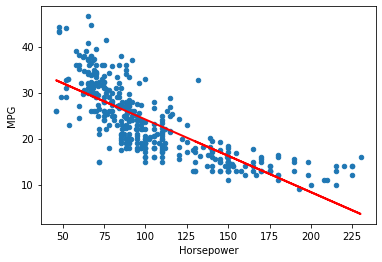

In [52]:
%matplotlib inline
dataset.plot(kind = "scatter", x = "Horsepower", y ="MPG")
plt.plot(pd.DataFrame(dataset["Horsepower"]), mpg_pred, c="red", linewidth = 2)

In [54]:
dataset["mpg_pred"] = 39.935861 - 0.157845*dataset["Horsepower"]
dataset["RSE"] = (dataset["MPG"]-dataset["mpg_pred"])**2

In [55]:
SSD = sum(dataset["RSE"])
SSD

9385.915872278249

In [56]:
RSE = np.sqrt(SSD / (len(dataset) - 2) )
RSE

4.9057569196363175

In [57]:
mpg_media = np.mean(dataset["MPG"])
mpg_media

23.44591836734694

In [58]:
error = RSE / mpg_media
error

0.20923714067300303

(array([  2.,  12.,  57.,  94., 101.,  65.,  30.,  20.,   9.,   2.]),
 array([-13.571021 , -10.5215125,  -7.472004 ,  -4.4224955,  -1.372987 ,
          1.6765215,   4.72603  ,   7.7755385,  10.825047 ,  13.8745555,
         16.924064 ]),
 <BarContainer object of 10 artists>)

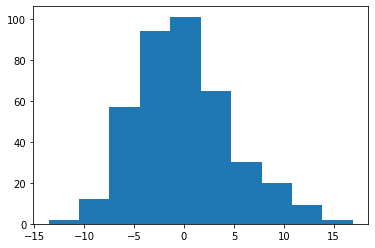

In [59]:
plt.hist((dataset["MPG"] - dataset["mpg_pred"]))

## Regresión lineal múltiple

### Modelo 2

In [78]:
#Añadir el displacement al modelo existente
lm2 = smf.ols(formula="MPG~Acceleration+Horsepower", data = dataset).fit()

In [79]:
lm2.params

Intercept       52.559325
Acceleration    -0.609772
Horsepower      -0.187966
dtype: float64

In [80]:
lm2.pvalues

Intercept       4.560373e-63
Acceleration    6.283582e-07
Horsepower      2.265814e-69
dtype: float64

In [81]:
lm2.rsquared

0.6303385179880159

In [82]:
lm2.rsquared_adj

0.6284379448157178

In [83]:
mpg_pred = lm2.predict(dataset[["Acceleration", "Horsepower"]])
mpg_pred

0      20.806423
1      14.532484
2      17.656867
3      17.047094
4      19.841417
         ...    
393    26.881766
394    27.784674
395    29.696787
396    26.368214
397    25.316497
Length: 392, dtype: float64

In [84]:
SSD = sum((dataset["MPG"]-mpg_pred)**2)
SSD

8804.96442592765

In [85]:
RSE = np.sqrt(SSD/(len(dataset)-2-1)) #2 = num de variables predictoras
RSE 

4.757611794748625

In [86]:
error = RSE / mpg_media
error 

0.20291855154518224

In [87]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     331.7
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           8.67e-85
Time:                        01:35:10   Log-Likelihood:                -1166.1
No. Observations:                 392   AIC:                             2338.
Df Residuals:                     389   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.5593      2.587     20.316      0.000      47.473      57.646
Acceleration    -0.6098      0.120     -5.066      0.000      -0.846      -0.373
Horsepower      -0.1880      0.009    -21.788      0.000      -0.205      -0.171
==============================================================================
Omnibus:                       31.573   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.488
Skew:                           0.685   Prob(JB):                     7.24e-09
Kurtosis:                       3.647   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 3

In [103]:
#Añadir la weight al modelo existente
lm3 = smf.ols(formula="MPG~Acceleration+Horsepower+Weight", data = dataset).fit()

In [104]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          7.48e-103
Time:                        01:45:49   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.6783      2.409     18.965      0.000      40.943      50.414
Acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
Horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
Weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
mpg_pred = lm3.predict(dataset[[ "Acceleration", "Horsepower", "Weight"]])
SSD = sum((dataset["MPG"]-mpg_pred)**2)
RSE = np.sqrt(SSD/(len(dataset)-3-1))
RSE

4.245628552745735

In [114]:
RSE/mpg_media

0.18108177663275538

### Modelo 4

In [138]:
#Añadir todas al modelo existente
lm4 = smf.ols(formula="MPG~ModelYear+Origin+Horsepower", data = dataset).fit()

In [139]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     373.8
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          4.83e-114
Time:                        02:00:12   Log-Likelihood:                -1094.9
No. Observations:                 392   AIC:                             2198.
Df Residuals:                     388   BIC:                             2214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.8875      4.903     -4.056      0.000     -29.527     -10.248
ModelYear      0.6628      0.060     11.049      0.000       0.545       0.781
Origin         2.6079      0.280      9.310      0.000       2.057       3.159
Horsepower    -0.1066      0.006    -16.811      0.000      -0.119      -0.094
==============================================================================
Omnibus:                       16.938   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.974
Skew:                           0.489   Prob(JB):                     0.000125
Kurtosis:                       3.380   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
mpg_pred = lm4.predict(dataset[[ "ModelYear", "Origin", "Horsepower"]])
SSD = sum((dataset["MPG"]-mpg_pred)**2)
RSE = np.sqrt(SSD/(len(dataset)-3-1))
RSE

3.972600616517742

In [141]:
RSE/mpg_media

0.16943676738422714